In [5]:
%matplotlib ipympl

In [45]:
import sys
import os
import matplotlib.pyplot as plt
import geopandas as gpd
sys.path.append('..')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from h3_helper import *

## Elevation raster 

In [7]:
raster = os.path.dirname(os.getcwd()) + r"/data/eesti_clipped/small_extent/MeritDEM90m.tif"

In [5]:
area = gpd.read_file(r'd:\UT\2Semester\Planning Project\task2\data\shp\Tartu_area.shp')

In [6]:
area = area.to_crs('EPSG:4326')

In [38]:
world_countries = gpd.read_file(r'd:\UT\GISData\NaturalEarth\ne_100m_admin_0_countries\ne_100m_admin_0_countries.shp')

In [39]:
boundary =  world_countries[world_countries['ADMIN']=='Estonia'].boundary.to_crs('EPSG:3301')

In [8]:
h3_el_10 = raster_to_h3(raster, 'elevation', 7, 9, None, 0.08)

Raster pixel size 92.6624388709314
8
Start filling raster extent with h3 indexes at resolution 8
Start getting raster values for hexes at resolution 8


In [14]:
h3_el_10 = create_h3_geometry(h3_el_10)

In [9]:
h3_el_9 = cell_h3_downsampling(h3_el_10,'cell_id','elevation',7,'numeric')
h3_el_9 = create_h3_geometry(h3_el_9)

In [10]:
h3_el_8 = cell_h3_downsampling(h3_el_9,'cell_id','elevation',6,'numeric')
h3_el_8 = create_h3_geometry(h3_el_8)

In [11]:
h3_el_7 = cell_h3_downsampling(h3_el_8,'cell_id','elevation',5,'numeric')
h3_el_7 = create_h3_geometry(h3_el_7)

In [24]:
h3_el_10 = h3_el_10.to_crs('EPSG:3301')
h3_el_9 = h3_el_9.to_crs('EPSG:3301')
h3_el_8 = h3_el_8.to_crs('EPSG:3301')
h3_el_7 = h3_el_7.to_crs('EPSG:3301')

In [12]:
h3_el_8.plot(column='elevation')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
h3_el_10.to_csv(r'd:\Positium\kepler\data\h3\tartu_elev.csv',index=False)

In [61]:
fig, ax = plt.subplots(1,4,figsize=(20,13),sharex='col')
ax[0].axis('off')
ax[0].margins(0)
ax[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[0].set_title('Resolution 8')
ax[1].axis('off')
ax[1].margins(0)
ax[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1].set_title('Resolution 7')
ax[2].axis('off')
ax[2].margins(0)
ax[2].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[2].set_title('Resolution 6')
ax[3].axis('off')
ax[3].margins(0)
ax[3].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[3].set_title('Resolution 5')
h3_el_10.plot(column='elevation',ax=ax[0])
boundary.plot(color=None, edgecolor='r',linewidth = 0.3,ax=ax[0])
h3_el_9.plot(column='elevation',ax=ax[1])
boundary.plot(color=None, edgecolor='r',linewidth = 0.3,ax=ax[1])
h3_el_8.plot(column='elevation',ax=ax[2])
boundary.plot(color=None, edgecolor='r',linewidth = 0.3,ax=ax[2])
#divider = make_axes_locatable(ax[3])
#cax = divider.append_axes("right", size="5%", pad=0.1)
h3_el_7.plot(column='elevation',ax=ax[3])
boundary.plot(color=None, edgecolor='r',linewidth = 0.3,ax=ax[3])
plt.tight_layout()
plt.savefig(r'd:\30_days\h3_elev.png', bbox_inches="tight", pad_inches=0.1, dpi=300)

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
fig, ax = plt.subplots(1,4,figsize=(15,8),sharex='col')
ax[0].axis('off')
ax[0].margins(0)
ax[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1].axis('off')
ax[1].margins(0)
ax[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[2].axis('off')
ax[2].margins(0)
ax[2].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[3].axis('off')
ax[3].margins(0)
ax[3].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
h3_el_10.plot(column='elevation',ax=ax[0])
h3_el_9.plot(column='elevation',ax=ax[1])
h3_el_8.plot(column='elevation',ax=ax[2])
h3_el_7.plot(column='elevation',ax=ax[3])
plt.tight_layout()
plt.savefig(r'd:\30_days\h3_elev.png', bbox_inches="tight", pad_inches=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

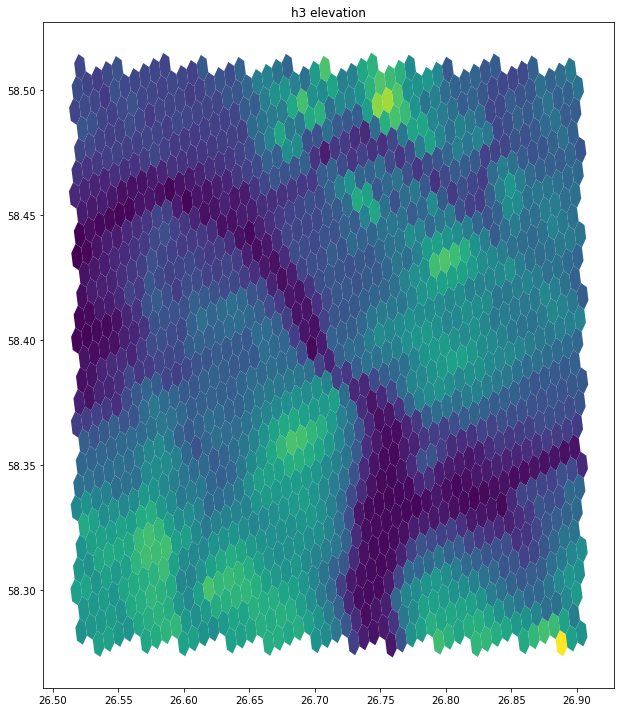

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
h3_el_8.plot(column='elevation',ax=ax)
ax.set_title('h3 elevation')
plt.tight_layout()

## Corine landcover vector

In [6]:
vector = os.path.dirname(os.getcwd()) + r'\data\eesti_clipped\land_cover\CorineEestiWGS84.gpkg'

In [7]:
corine_legend = pd.read_pickle(os.path.dirname(os.getcwd()) + r'/data/eesti_clipped/land_cover/corine_legend.pkl')

In [8]:
h3_cor_11 = vector_to_h3(vector,'code_18',11,[26.521263, 58.283163, 26.900083, 58.505180])

Start filling raster extent with h3 indexes at resolution 11


In [9]:
h3_cor_11 = create_h3_geometry(h3_cor_11)

In [10]:
h3_cor_10 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',10,'categorical')
h3_cor_10 = create_h3_geometry(h3_cor_10)

In [11]:
h3_cor_9 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',9,'categorical')
h3_cor_9 = create_h3_geometry(h3_cor_9)

In [12]:
h3_cor_8 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',8,'categorical')
h3_cor_8 = create_h3_geometry(h3_cor_8)

In [13]:
fig, ax = plt.subplots(4,1,figsize=(7,18),sharex='col')
h3_cor_11.plot(column='code_18',ax=ax[0])
h3_cor_10.plot(column='code_18',ax=ax[1])
h3_cor_9.plot(column='code_18',ax=ax[2])
h3_cor_8.plot(column='code_18',ax=ax[3])
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

In [22]:
h3_cor_9 = h3_cor_9.merge(corine_legend, left_on='code_18', right_on='CLC_CODE')

In [25]:
h3_cor_9 = gpd.GeoDataFrame(h3_cor_9)
h3_cor_9.crs = 'EPSG:4326'

In [229]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = ListedColormap([color.tolist() for code, color in palete.items()
                           if str(code) in h3_cor_9['code_18'].unique()])
leg_texts = h3_cor_9.sort_values(by='code_18')['LABEL3'].unique()
h3_cor_9.plot(ax=ax, column='code_18', cmap = cmap, categorical = True, legend = True, legend_kwds={'loc': 'lower center', 'ncol':2})
ax.set_title('h3 landcover')
leg = ax.get_legend()
#box = ax.get_position()
#ax.set_position([box.x0, 0.025, box.width, box.height])
for text, label in zip(leg.get_texts(), leg_texts):
    text.set_text(label)
leg.set_bbox_to_anchor((0.5, -0.6))
plt.tight_layout()
plt.show()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [151]:
fig, ax = plt.subplots(figsize=(10,10))
for cor_class, data in h3_cor_9.groupby('code_18'):
    #print(cor_class)
    color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
    data.plot(ax=ax,color=color)
ax.set_title('h3 landcover')
plt.show()
plt.tight_layout()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …